In [7]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import random
import sklearn
import sklearn.preprocessing
import sklearn.utils

# Import data
train = pd.read_csv('train.txt')
test = pd.read_csv('test.txt')

train.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                 "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", 
                 "label"]
test.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]
tokens = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

data_train = train.loc[:, tokens].values
data_test = test.loc[:, tokens].values
data_label = train.loc[:, "label"].values

# Standardization
data_train = sklearn.preprocessing.scale(data_train.astype(float))
data_test = sklearn.preprocessing.scale(data_test.astype(float))
# data_train = (data_train - np.mean(data_train, axis=0)) / np.std(data_train, axis=0)
# data_test = (data_test - np.mean(data_test, axis=0)) / np.std(data_test, axis=0)

for i in range(len(data_label)):
    if (data_label[i] == " >50K"):
        data_label[i] = 1
    else:
        data_label[i] = -1

data_train = np.hstack((data_train, np.reshape(data_label, (43956, 1))))
# Cost function
def cost_function(x, y, a, b, l):
    s = 0
    for i in range(len(x)):
        s += max(0, 1-y[i]*(np.dot(a, x[i])+b))
    return s/len(x)+l*np.dot(a, a)/2

# SGD step
def step(x, y, a, b, l, rate):
    g_a = np.zeros(6)
    g_b = 0
    idx = random.randint(0, len(x)-1)          
    if (y[idx]*(np.inner(a, x[idx]) + b) >= 1):       
        g_a = l*a
        g_b = 0
    else:
        g_a = l*a - y[idx]*x[idx]
        g_b = -y[idx]
    a_new = a - rate*g_a
    b_new = b - rate*g_b  
    return (a_new, b_new)

def accuracy(_x, _y, a, b):
    total_correct = 0
    for n in range(len(_x)):
        y = _y[n]
        x = _x[n][:]
        p = np.inner(a, x) + b
        if (p >= 0):
            p = 1
        else:
            p = -1
        if (p == y):
            total_correct += 1
    return total_correct/np.float(len(_x))

In [8]:
#global variable
a_init = np.zeros(6)
b_init = 0
num_seasons = 50
num_steps = 300
lam = 0.001

In [9]:
# Start iteration
def run(a = 1):
    a_est = a_init
    b_est = b_init

    tr = sklearn.utils.shuffle(data_train)
    x_test = tr[39560:, 0:-1]
    y_test = tr[39560:, 6]

    val_accuracy_arr = []
    val_coefficient = []
    for s in range(num_seasons):
        # Update learning rate  
        l_rate = 1/(50+0.01*s)
        # Shuffle data
        tr = sklearn.utils.shuffle(tr)
        x_train = tr[50:, 0:-1]
        y_train = tr[50:, 6]
        x_hd = tr[0:50, 0:-1]
        y_hd = tr[0:50, 6]
        for k in range(num_steps):       
            a_est, b_est = step(x_train, y_train, a_est, b_est, lam, l_rate)
            if (k%30 == 0):
                temp = accuracy(x_hd, y_hd, a_est, b_est)
                temp2 = np.dot(a_est, a_est)
                val_accuracy_arr.append(temp)
                val_coefficient.append(temp2)
                # print(accuracy(x_hd, y_hd, a_est, b_est))
    if (a == 0):
        print(accuracy(x_test, y_test, a_est, b_est))
    return val_accuracy_arr, val_coefficient, a_est, b_est
# print(val_accuracy_arr)
# print(accuracy(x_test, y_test, a_est, b_est))

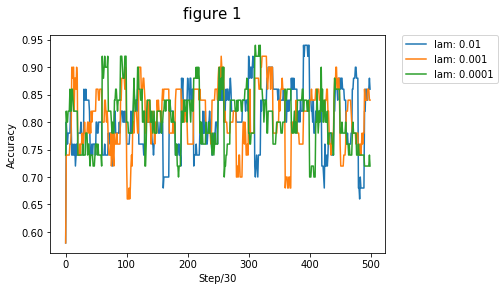

In [10]:
ax = plt.figure()
ax.suptitle('figure 1', fontsize = 15)
a = ax.add_subplot(111)
a.set_xlabel('Step/30')
a.set_ylabel('Accuracy')
for testant in [0.01, 0.001, 0.0001]:
    lam = testant
    val_accuracy_arr, _, _, _ = run()
    a.plot(val_accuracy_arr, label="lam: " + str(testant))
a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

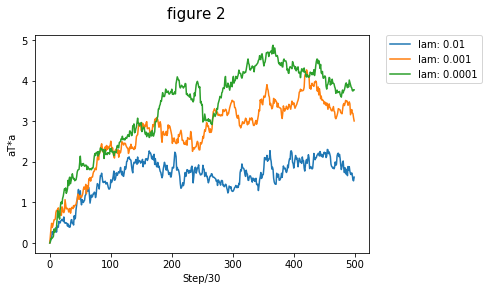

In [11]:
bx = plt.figure()
bx.suptitle('figure 2', fontsize = 15)
b = bx.add_subplot(111)
b.set_xlabel('Step/30')
b.set_ylabel('aT*a')
for testant in [0.01, 0.001, 0.0001]:
    lam = testant
    _, val_coefficient, _, _ = run()
    b.plot(val_coefficient, label="lam: " + str(testant))
b.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
#configure
b_init = 0
num_seasons = 50
num_steps = 300
lam = 0.001

_, _, a_est, b_est = run(0)


0.802547770700637
